# Multiclass Classification problem 

1. Become one with the data
2. Preprocess the data 
3. create the model 
4. Fit the model 
5. Evaluate the model 
6. Adjust different hyperparameter and improve the model 
7. Repeat until satisfied 

In [ ]:
# get the data from the following link 
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip

zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2021-09-18 17:06:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   149MB/s    in 3.4s    

2021-09-18 17:06:04 (145 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os 

# walk through 10 classes of the  directory and list the number of files 

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 10 directories and 0 imag

In [ ]:
# Fet the classnames programatically 

import pathlib
import numpy as np

data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names= class_names[1:]
print(class_names)

[]


In [ ]:
# Let's visualize our images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir,target_class):

  # Set up the directory where we will view the images from 
  target_folder=target_dir+'/'+target_class

  # Get the random image path 
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image) 

  # Read the image and plot it 
  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape : {img.shape}")

  return img


## 1. Become one with the data  

In [ ]:
# Setup the train and test directories

train_dir= "10_food_classes_all_data/train/"
test_dir= "10_food_classes_all_data/test/"

In [ ]:
# lets get teh class names 
import pathlib 
import numpy as np 

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3280453.jpg']
image shape : (512, 512, 3)


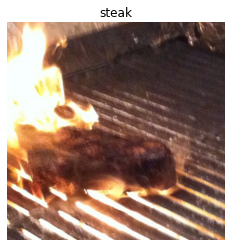

In [ ]:
# Lets visualise 
import random 
img =view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))

## 2. Lets Pre-process the data  

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# REscale 
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)


# Lets load the train data and turn it into batches 
train_data= train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="categorical")

# Lets load the test data and turn it into batches 
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. create a model (start with a baseline)

Lets replicate the model in the CNN explainer website 

 

In [ ]:
# Create the mdoel 
import tensorflow as tf


model_1=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu',input_shape=(224,224,3) ),
                             tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2),
                             tf.keras.layers.Conv2D(10,3, activation='relu'),
                             tf.keras.layers.Conv2D(10,3,activation='relu'),
                             tf.keras.layers.MaxPool2D(2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10,activation='softmax')
                                                  ])

# Compile the model 
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

# Fit the model 
model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 82s 229ms/step - loss: 2.2135 - accuracy: 0.1747 - val_loss: 2.0970 - val_accuracy: 0.2444
Epoch 2/5
235/235 [==============================] - 54s 231ms/step - loss: 1.9594 - accuracy: 0.3167 - val_loss: 1.9163 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 55s 235ms/step - loss: 1.6626 - accuracy: 0.4371 - val_loss: 1.9135 - val_accuracy: 0.3412
Epoch 4/5
235/235 [==============================] - 55s 236ms/step - loss: 1.1486 - accuracy: 0.6172 - val_loss: 2.2205 - val_accuracy: 0.3136
Epoch 5/5
235/235 [==============================] - 55s 236ms/step - loss: 0.5773 - accuracy: 0.8109 - val_loss: 2.9429 - val_accuracy: 0.2908


In [ ]:
model_1.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)            

# 4. Evaluate the model 

Lets Evaluate the model on the test data.

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 2.9429 - accuracy: 0.2908


[2.9428961277008057, 0.290800005197525]

### 5. Adjust the model to reduce the overfitting

Lets list out the things that we can use to reduce the overfitting:

1. Get more data 
2. Simplify the model to reduce the model (reduce the number of hidden units)
3. Use data augumentation 
4. Use transfer learning 

In [ ]:
# Lets simplify the model 

# create the model 
model_2=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(10,activation='softmax')
                             
])

# Compile the model 
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

# Fit the model

history_2=model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))




Epoch 1/5
235/235 [==============================] - 50s 210ms/step - loss: 2.2329 - accuracy: 0.1709 - val_loss: 2.0726 - val_accuracy: 0.2552
Epoch 2/5
235/235 [==============================] - 49s 211ms/step - loss: 1.8673 - accuracy: 0.3615 - val_loss: 1.9595 - val_accuracy: 0.3064
Epoch 3/5
235/235 [==============================] - 49s 210ms/step - loss: 1.4565 - accuracy: 0.5248 - val_loss: 2.0217 - val_accuracy: 0.3012
Epoch 4/5
235/235 [==============================] - 49s 210ms/step - loss: 0.8778 - accuracy: 0.7319 - val_loss: 2.3078 - val_accuracy: 0.3000
Epoch 5/5
235/235 [==============================] - 49s 210ms/step - loss: 0.4225 - accuracy: 0.8836 - val_loss: 2.7714 - val_accuracy: 0.2880


In [ ]:
# Since there are no improvement by removing the layer, we want to augument the data before fitting the data 

train_datagen_augument=ImageDataGenerator(rescale=1/255., 
                                          horizontal_flip=True,
                                          zoom_range=0.2,
                                          shear_range=0.2)

train_data_augument=train_datagen_augument.flow_from_directory(train_dir,
                                                               target_size=(224,224),
                                                               class_mode='categorical')



Found 7500 images belonging to 10 classes.


In [ ]:
model_3=tf.keras.models.clone_model(model_2)


model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

history_3=model_3.fit(train_data_augument,
                      steps_per_epoch=len(train_data_augument),
                      epochs=5,
                      validation_data=test_data,
                      validation_steps=len(test_data))
 

Epoch 1/5
235/235 [==============================] - 120s 507ms/step - loss: 2.1416 - accuracy: 0.2256 - val_loss: 1.9493 - val_accuracy: 0.3192
Epoch 2/5
235/235 [==============================] - 121s 515ms/step - loss: 1.9342 - accuracy: 0.3313 - val_loss: 1.9622 - val_accuracy: 0.3268
Epoch 3/5
235/235 [==============================] - 122s 521ms/step - loss: 1.8563 - accuracy: 0.3707 - val_loss: 1.7719 - val_accuracy: 0.3916
Epoch 4/5
235/235 [==============================] - 119s 508ms/step - loss: 1.8049 - accuracy: 0.3823 - val_loss: 1.7835 - val_accuracy: 0.3904
Epoch 5/5
235/235 [==============================] - 122s 520ms/step - loss: 1.7371 - accuracy: 0.4183 - val_loss: 1.7538 - val_accuracy: 0.4048


In [ ]:
def load_custom_img(filename, img_shape=224):
  """
  Reads an image from a filename and rehsapes and pre-process it to send it to the model
  """

  # read the image
  img=tf.io.read_file(filename)
  # Decode the read file into a tensor
  img=tf.image.decode_image(img)
  # Resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  # rescale the image( to the values between 0 and 1)
  img=img/255.
  return img 

In [ ]:
def pred_plot(model,filename,class_names=class_names):
  """
  imports an image located at a filename and makes aprediction with the model .
  Finally plots the image and the predicted class as the title 
  """

  # import the target image and pre-process it 
  img=load_custom_img(filename)

  # Make prediction 
  pred=model.predict(tf.expand_dims(img,axis=0))

  # plot the image and the result
  steak=mpimg.imread(filename)
  plt.imshow(steak);
  plt.axis(False)
  plt.show()

 
  print(tf.argmax(pred[0]))
  # print the class name 
  print(class_names[int(tf.argmax(pred[0]))])

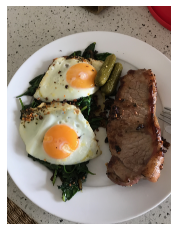

tf.Tensor(5, shape=(), dtype=int64)
ice_cream


In [ ]:
pred_plot(model_4,'03-steak.jpeg',class_names)

--2021-09-18 18:10:44--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2021-09-18 18:10:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-09-18 18:10:45 (32.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/19

(-0.5, 3023.5, 4031.5, -0.5)

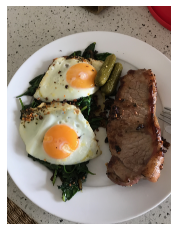

In [ ]:
# Get the custom image to test it on the model that is being developed 
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak);
plt.axis(False)

In [ ]:
# Lets Save and load the model 

model_3.save('food_101_model')

INFO:tensorflow:Assets written to: food_101_model/assets


In [ ]:
loaded_model_3=tf.keras.models.load_model('food_101_model')
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 1.7538 - accuracy: 0.4048


[1.753844976425171, 0.4047999978065491]

In [ ]:
# Lets use callbacks 

import tensorflow as tf

# set the random seed

tf.random.set_seed(42)


def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate

model_checkpoint=tf.keras.callbacks.ModelCheckpoint('model_4.hdf5',save_best_only=True)
learning_rate=tf.keras.callbacks.LearningRateScheduler(step_decay)
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)


# build the model 

model_4=tf.keras.Sequential([
                             tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
                             tf.keras.layers.Conv2D(10,3,activation='relu'),
                             tf.keras.layers.MaxPool2D(2),
                             tf.keras.layers.Conv2D(10,3,activation='relu'),
                             tf.keras.layers.Conv2D(10,2,activation='relu'),
                             tf.keras.layers.MaxPool2D(2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10,activation='softmax')
])


# Compile the model 

model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model 
history_4=model_4.fit(train_data_augument,
            steps_per_epoch=len(train_data_augument),
            validation_data=test_data,
            validation_steps=len(test_data),
            epochs=15,
            callbacks=[learning_rate,early_stopping,model_checkpoint]) 

Epoch 1/15
235/235 [==============================] - 132s 557ms/step - loss: 2.3273 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/15
235/235 [==============================] - 130s 553ms/step - loss: 2.3044 - accuracy: 0.0927 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/15
235/235 [==============================] - 131s 557ms/step - loss: 2.3045 - accuracy: 0.0931 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 4/15
235/235 [==============================] - 130s 551ms/step - loss: 2.3045 - accuracy: 0.0964 - val_loss: 2.3028 - val_accuracy: 0.1000


In [ ]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate

import math
for i in range(100):
  print(step_decay(i))


0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.025
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.0125
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.00625
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.003125
0.0015625
0.0015625
0.0015625
0.0015625
0.0015625
0.0015625
0.0015625
0.0015625
0.0015625
0.0015625
0.00078125
0.00078125
0.00078125
0.00078125
0.00078125
0.00078125
0.00078125
0.00078125
0.00078125
0.00078125
0.000390625
0.000390625
0.000390625
0.000390625
0.000390625
0.000390625
0.000390625
0.000390625
0.000390625
0.000390625
0.0001953125
0.0001953125
0.0001953125
0.0001953125
0.0001953125
0.0001953125
0.0001953125
0.0001953125
0.0001953125
0.0001953125
9.765625e-05


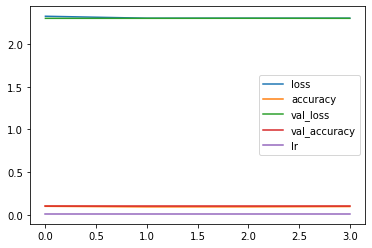

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot() b

In [ ]:
model_4.evaluate(test_data)

79/79 [==============================] - 13s 167ms/step - loss: 2.4873 - accuracy: 0.1000


[2.487321138381958, 0.10000000149011612]

In [ ]:
pred_plot(model_4,'03-steak.jpeg',class_names)

NameError: ignored